In [7]:
from img_processing import *
from nilearn.image import resample_img
import pylab as plt
import nibabel as nb
import numpy as np

In [8]:
orig_nii = nb.load("t1c_bet.nii.gz")

In [9]:
np.round(orig_nii.affine)

array([[-1., -0.,  0., -0.],
       [-0.,  1., -0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
##Downsampling

In [10]:
def func_read_imageshape(img):
    ####
    print('run_func_read_imageshape')
    ####       
    img= sitk.ReadImage(img)
    size = img.GetSize()
    spacing = img.GetSpacing()
    
    ##
    print('img','size',size,'spacing',spacing) 

In [11]:
img="t1c_bet.nii.gz"
func_read_imageshape(img)

run_func_read_imageshape
img size (240, 240, 170) spacing (1.0, 1.0, 1.0)


In [12]:
orig_nii.shape

(240, 240, 170)

In [13]:
orig_nii.header.get_zooms()

(1.0, 1.0, 1.0)

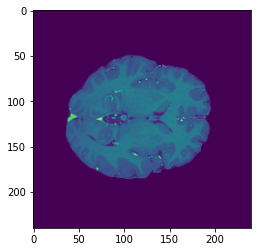

In [14]:
plt.imshow(orig_nii.dataobj[:,:,80])

In [15]:
downsampled_nii = resample_img(orig_nii, target_affine=np.eye(3)*2., interpolation='nearest')

In [16]:
downsampled_nii.affine

array([[   2.        ,    0.        ,    0.        , -252.71391738],
       [   0.        ,    2.        ,    0.        ,  -24.30825145],
       [   0.        ,    0.        ,    2.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [17]:
downsampled_nii.shape

(128, 133, 93)

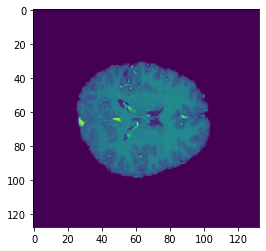

In [18]:
plt.imshow(downsampled_nii.dataobj[:,:,50])

In [19]:
##Upsampling

In [20]:
upsampled_nii = resample_img(orig_nii, target_affine=np.eye(3)*0.5, interpolation='nearest')

In [21]:
upsampled_nii.affine

array([[   0.5       ,    0.        ,    0.        , -252.71391738],
       [   0.        ,    0.5       ,    0.        ,  -24.30825145],
       [   0.        ,    0.        ,    0.5       ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [22]:
upsampled_nii.shape

(508, 526, 368)

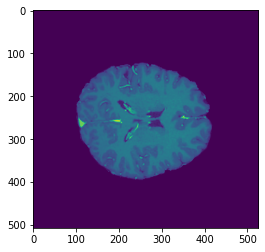

In [23]:
plt.imshow(upsampled_nii.dataobj[:,:,200])

In [24]:
##Resampling with cropping/padding

In [25]:
target_shape = np.array((240,40,100))
new_resolution = [2,]*3
new_affine = np.zeros((4,4))
new_affine[:3,:3] = np.diag(new_resolution)
# putting point 0,0,0 in the middle of the new volume - this could be refined in the future
new_affine[:3,3] = target_shape*new_resolution/2.*-1
new_affine[3,3] = 1.
downsampled_and_cropped_nii = resample_img(orig_nii, target_affine=new_affine, target_shape=target_shape, interpolation='nearest')

In [26]:
downsampled_and_cropped_nii.affine


array([[   2.,    0.,    0., -240.],
       [   0.,    2.,    0.,  -40.],
       [   0.,    0.,    2., -100.],
       [   0.,    0.,    0.,    1.]])

In [27]:
downsampled_and_cropped_nii.shape


(240, 40, 100)

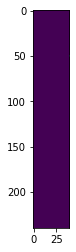

In [28]:
plt.imshow(downsampled_and_cropped_nii.dataobj[:,:,70])